In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [2]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(X)
# These are the labels
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']


In [3]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
         X, y, test_size=0.2, random_state=0)

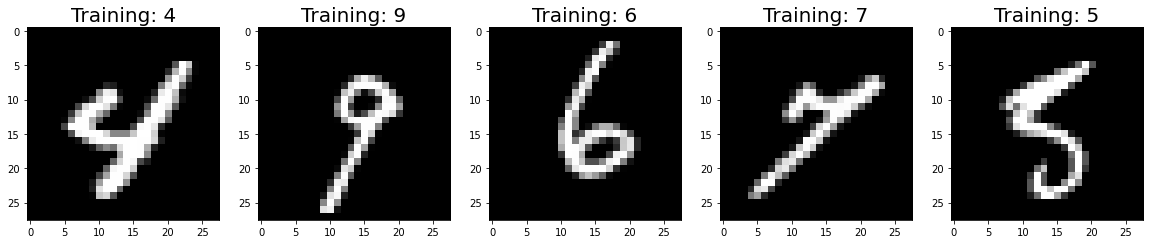

In [4]:

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title(f'Training: {train_lbl[index]}' , fontsize = 20)

In [5]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [7]:
predictions = logisticRegr.predict(test_img)

In [8]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9172142857142858


In [9]:
count = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label == predict:
        count += 1
    if label != predict: 
        misclassifiedIndexes.append(count)
        count += 1

#misclassifiedIndexes
#len(misclassifiedIndexes)

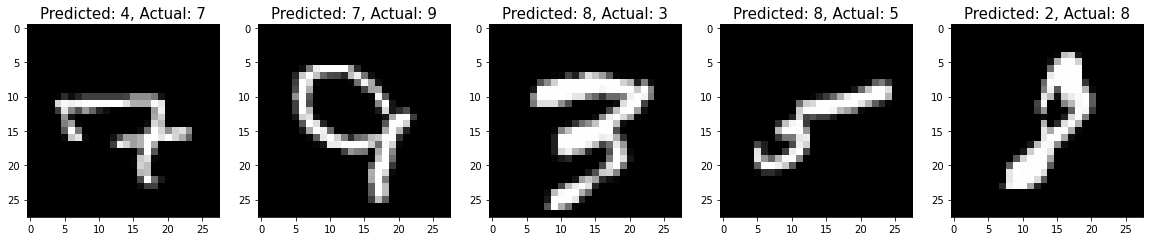

In [10]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [12]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[1348    0    3    2    2   11   14    1    6    0]
 [   0 1541    6    5    2    4    1    5   14    2]
 [   6   17 1294   19   20    4   16   13   50    4]
 [   5    5   50 1261    1   43    4   13   39   14]
 [   2    4    9    2 1259    2   15   11    6   40]
 [  11    5   12   46   13 1053   22    7   49   13]
 [  13    5   14    1   16   20 1310    3    5    0]
 [   3    6   21    6   15    1    1 1347    7   51]
 [   4   34   11   31    9   38   16    2 1210   13]
 [   4    4   10   16   49    7    1   39   13 1218]]


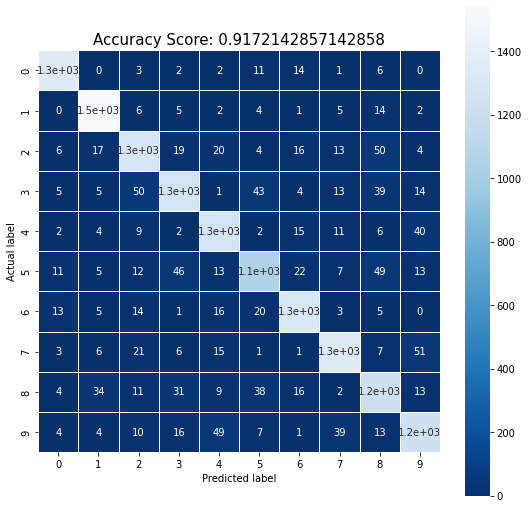

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);